In [1]:
from pathlib import Path
import pandas as pd
import plotly.express as px

In [2]:
example_data_path = "../data sets/HAPT Data Set/RawData/acc_exp01_user01.txt"

df = pd.read_csv(
    example_data_path, header=None, sep=" ", names=["x_accel", "y_accel", "z_accel"]
)

labels_path = "../data sets/HAPT Data Set/RawData/labels.txt"

labels = pd.read_csv(
    labels_path,
    header=None,
    sep=" ",
    names=["experiment_num", "user_id", "activity_id", "start_idx", "end_idx"],
)

In [3]:
activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING",
    7: "STAND_TO_SIT",
    8: "SIT_TO_STAND",
    9: "SIT_TO_LIE",
    10: "LIE_TO_SIT",
    11: "STAND_TO_LIE",
    12: "LIE_TO_STAND",
}

In [6]:
exp1_user1_label = labels[(labels['experiment_num']==1) & (labels['user_id']==1)]

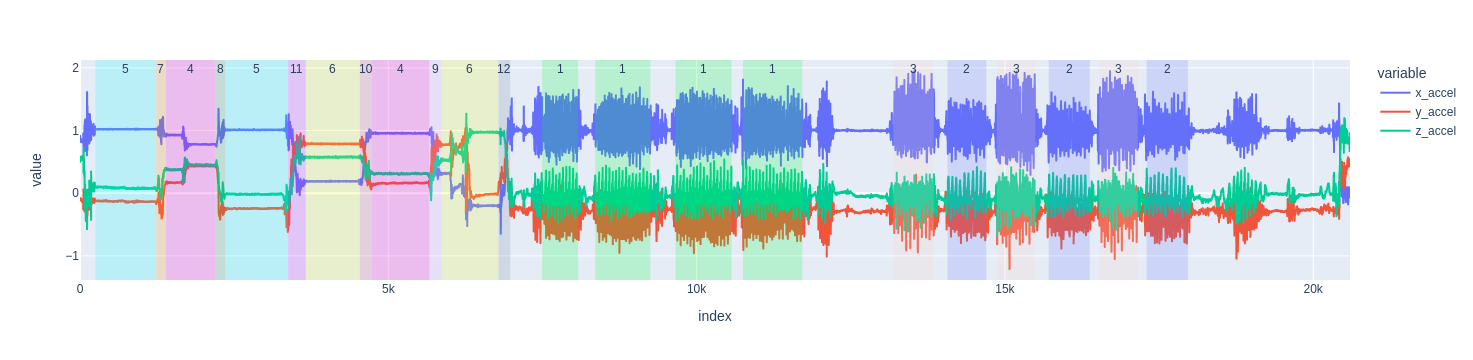

In [11]:
fig = px.line(df)

for index, row in exp1_user1_label.iterrows():
    fig.add_vrect(
        x0=row['start_idx'], x1=row['end_idx'],
        annotation_text=str(row['activity_id']),
        annotation_position="top",
        annotation_font_size=12,
        fillcolor=px.colors.qualitative.Light24[row['activity_id']],
        opacity=0.2,
        line_width=0
    )

fig.show()